In [1]:
import pandas as pd


df1 = pd.read_csv("Twitter_Data.csv")
df2 = pd.read_csv("apps.csv")
df3 = pd.read_csv("user_reviews.csv")


In [2]:
print("Twitter_Data.csv columns:", df1.columns.tolist())

Twitter_Data.csv columns: ['clean_text', 'category']


In [3]:
print("apps.csv columns:", df2.columns.tolist())

apps.csv columns: ['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [4]:
print("user_reviews.csv columns:", df3.columns.tolist())

user_reviews.csv columns: ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [5]:
print("\n--- Twitter_Data.csv ---")
print(df1.head())


--- Twitter_Data.csv ---
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [6]:
print("\n--- apps.csv ---")
print(df2.head())


--- apps.csv ---
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Desi

In [7]:
print("\n--- user_reviews.csv ---")
print(df3.head())


--- user_reviews.csv ---
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [8]:
print("Twitter_Data.csv columns:", df1.columns.tolist())
df1.head()

Twitter_Data.csv columns: ['clean_text', 'category']


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
print(df3.columns.tolist())
df3.head()

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [10]:
# Rename and select relevant columns
df3.rename(columns={"Translated_Review": "text"}, inplace=True)

# Drop rows with missing text or sentiment
df3.dropna(subset=["text", "Sentiment"], inplace=True)

# Keep only the necessary columns
df3 = df3[['text', 'Sentiment']]

# Rename 'Sentiment' to match the other dataset
df3.rename(columns={"Sentiment": "sentiment"}, inplace=True)

In [12]:
# Combine both datasets
combined_df = pd.concat([df1, df3], ignore_index=True)

# Check result
print("Combined Dataset Shape:", combined_df.shape)
print(combined_df['sentiment'].value_counts())
combined_df.head()


Combined Dataset Shape: (200407, 4)
sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


,clean_text,category,text,sentiment
0,when modi promised “minimum government maximum...,-1.0,NaN,NaN
1,talk all the nonsense and continue all the dra...,0.0,NaN,NaN
2,what did just say vote for modi welcome bjp t...,1.0,NaN,NaN
3,asking his supporters prefix chowkidar their n...,1.0,NaN,NaN
4,answer who among these the most powerful world...,1.0,NaN,NaN


In [15]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gadda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gadda\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'wordnet' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/wordnet.zip>:   [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gadda\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'omw-1.4' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/omw-1.4.zip>:   [WinError
[nltk_data]     10060] A con

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()

    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)
     Apply preprocessing to your combined dataset
combined_df['cleaned_text'] = combined_df['text'].astype(str).apply(preprocess_text)

# Preview
combined_df[['text', 'cleaned_text', 'sentiment']].head()


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


C:\Users\gadda\AppData\Local\Temp\ipykernel_18236\3743714712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='sentiment', palette='Set2')


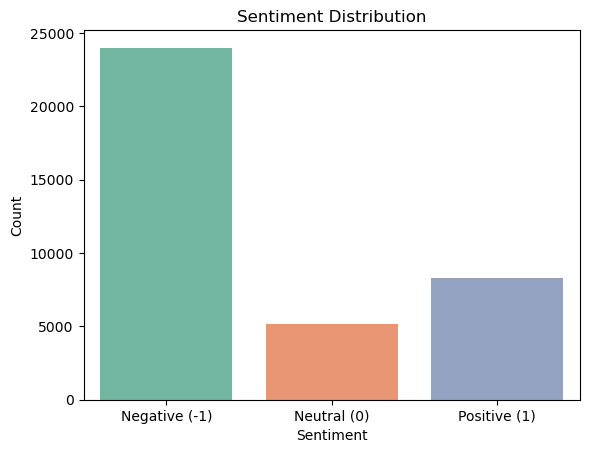

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=combined_df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.show()